## <b> Augmented Dickey-Fuller test (ADF)

The statistical tests for objectively determining whether differencing is required to stationarize a time series are known as unit root tests. There are several such tests of which we discuss the ADF test is one of the unit root tests, that is most commonly used for verifying non-stationarity in the original time series.

According to the ADF test, in the of the original series can be expressed as a linear regression model of the previous time index and first-order differences presence of autocorrelation, the first-order differences xt up to a lag of m times indices.

In other words, the null hypothesis is presence of unit root or non-stationarity, whereas the alternate hypothesis suggests stationarity of the data.

In [1]:
import os
import pandas as pd
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
# Read the data from into a pandas.DataFrame
air_miles = pd.read_csv('../Data Files/us-airlines-monthly-aircraft-miles-flown.csv', index_col = ['Month'])

In [3]:
# Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', air_miles.shape)

Shape of the DataFrame: (97, 1)


In [4]:
# Let's see first 10 rows of it
air_miles.head(5)

,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,
1963-01,6827.0
1963-02,6178.0
1963-03,7084.0
1963-04,8162.0
1963-05,8462.0


In [5]:
# Let's rename the 2nd column
air_miles.rename(columns={
    'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970': 'Air miles flown'
},inplace=True)

In [6]:
# Check for missing values and remove the row
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


Text(0.5,1,'Monthly air miles flown during 1963 - 1970')

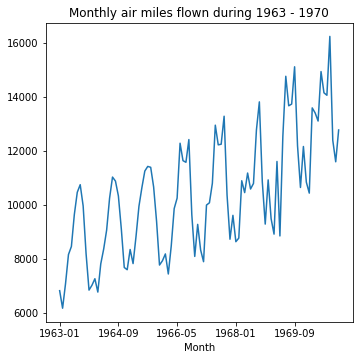

In [7]:
#Plot the time series of air miles flown
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
air_miles['Air miles flown'].plot(ax=ax)
ax.set_title('Monthly air miles flown during 1963 - 1970')

In [8]:
adf_result = stattools.adfuller(air_miles['Air miles flown'], autolag='AIC')

In [9]:
adf_result

(1.0229489778119756,
 0.9945022811234028,
 11,
 84,
 {'1%': -3.510711795769895,
  '5%': -2.8966159448223734,
  '10%': -2.5854823866213152},
 1356.2366247658094)

In [10]:
# alpha is the probability of rejecting the null hypothesis, if it is true.
# p-val > alpha Null hypothesis is not rejected means non-stationary series
# p-val < alpha Null hypothesis is rejected means stationary series

# The null hypothesis is NOT rejected as the p-value is greater than 0.05.

print('p-val of the ADF test in air miles flown:', adf_result[1])

p-val of the ADF test in air miles flown: 0.9945022811234028


#### <b> Summary table:

<table>
<tr>
    <td> 
        <b>Tests</b>
    </td>
    <td> 
        <b>Augmented Dickey-Fuller (ADF)</b>
    </td>
    <td> 
        <b>Ljung-Box</b>
    </td>
    <td> 
        <b>p-values</b>
    </td>
</tr>

<tr>
    <td> 
    Null Hypothesis
    </td>
    <td> 
    Non Stationary
    </td>
    <td> 
    Stationary
    </td>
    <td> 
    Reject < alpha or Accept > alpha
    </td>
</tr>
<tr>
    <td> 
    Alternative Hypothesis
    </td>
    <td> 
    Stationary
    </td>
    <td> 
    Non Stationary
    </td>
    <td> 
    Reject > alpha or Accept < alpha
    </td>
</tr>
</table>